In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Display basic information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.shape

(891, 12)

In [38]:
titanic = df

### Missing Value Analysis 

In [21]:
missing_value = df.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
# Survival counts
survival_counts = titanic['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


In [74]:
gender_survival = pd.crosstab(titanic['Sex'], titanic['Survived'])
gender_survival['Survival Rate'] = gender_survival[1] / (gender_survival[0] + gender_survival[1])
print(gender_survival)

Survived    0    1  Survival Rate
Sex                              
female     81  233       0.742038
male      468  109       0.188908


In [76]:
class_survival = pd.crosstab(titanic['Pclass'], titanic['Survived'])
class_survival['Survival Rate'] = class_survival[1] / (class_survival[0] + class_survival[1])
print(class_survival)

Survived    0    1  Survival Rate
Pclass                           
1          80  136       0.629630
2          97   87       0.472826
3         372  119       0.242363


# Visualize categorical features

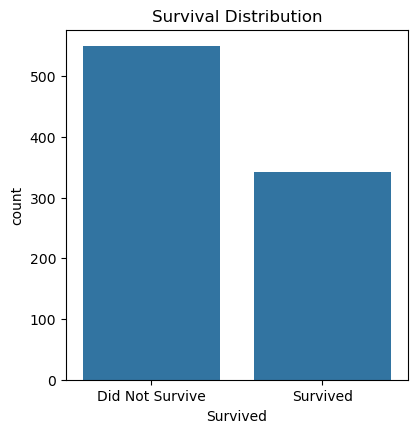

In [40]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Distribution')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

In [46]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

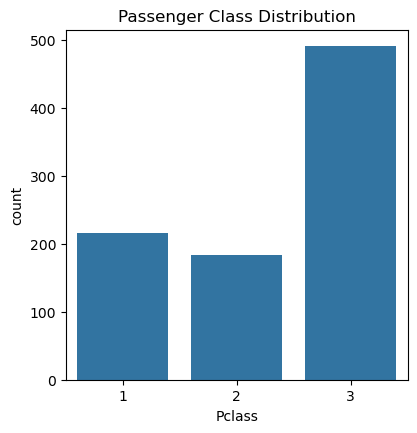

In [50]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', data=titanic)
plt.title('Passenger Class Distribution')
plt.show()

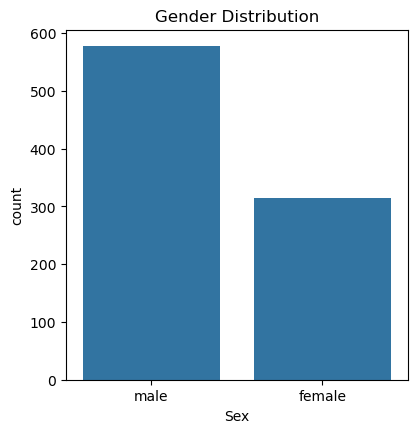

In [52]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 3)
sns.countplot(x='Sex', data=titanic)
plt.title('Gender Distribution')
plt.show()

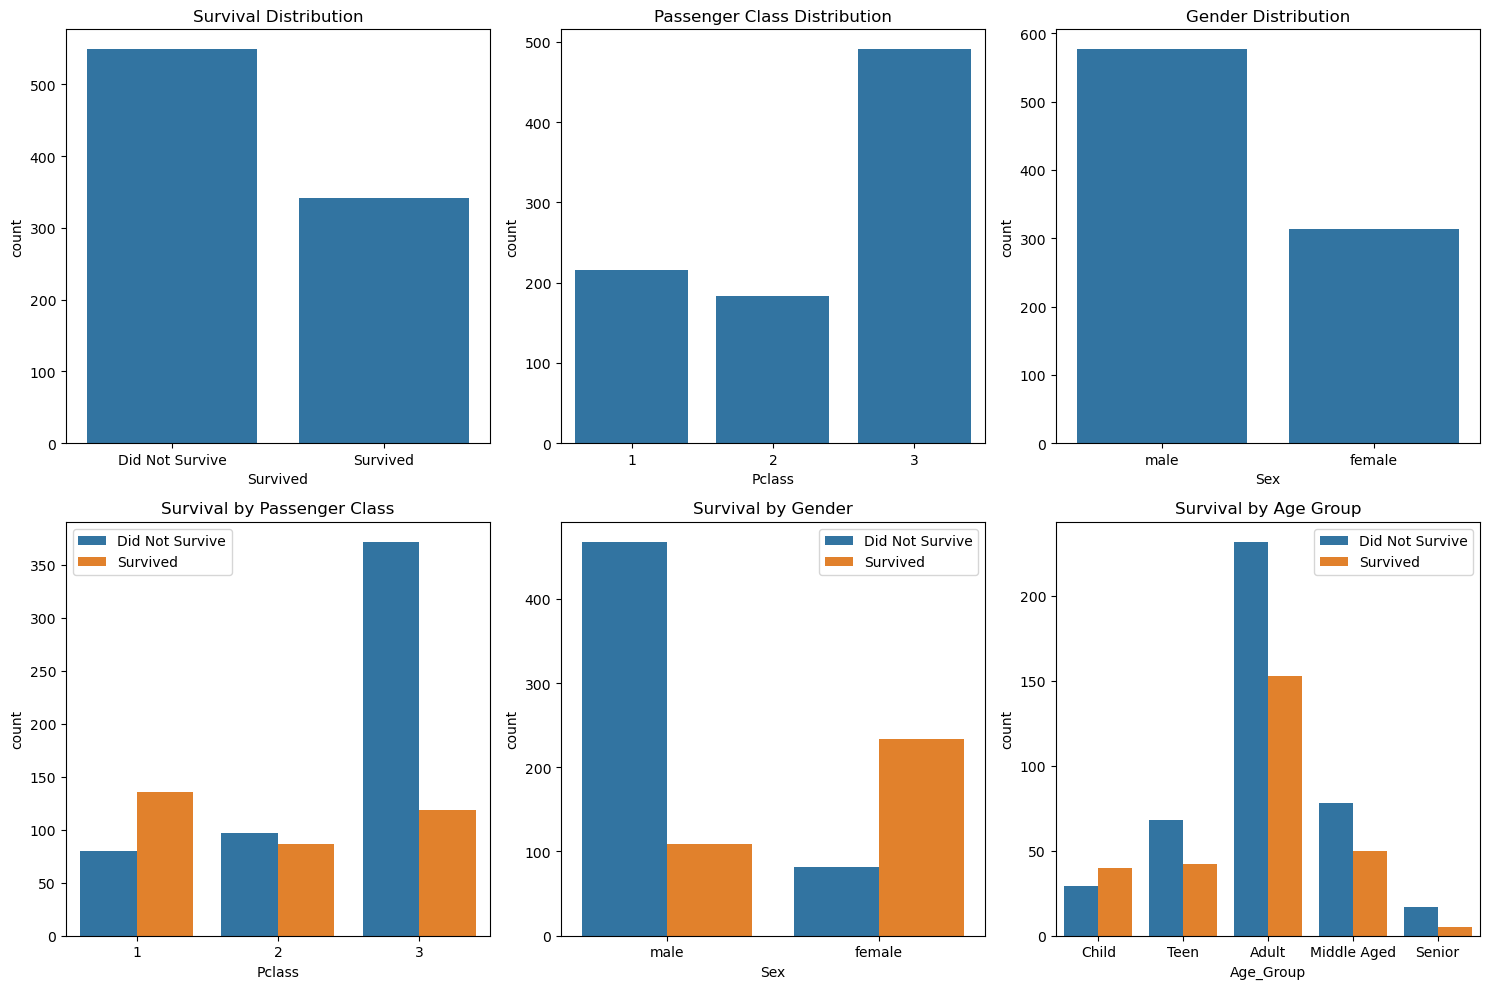

In [58]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Distribution')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', data=titanic)
plt.title('Passenger Class Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Sex', data=titanic)
plt.title('Gender Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.legend(['Did Not Survive', 'Survived'])

plt.subplot(2, 3, 5)
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival by Gender')
plt.legend(['Did Not Survive', 'Survived'])

plt.subplot(2, 3, 6)
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=[0, 12, 20, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])
sns.countplot(x='Age_Group', hue='Survived', data=titanic)
plt.title('Survival by Age Group')
plt.legend(['Did Not Survive', 'Survived'])

plt.tight_layout()


In [60]:
plt.savefig('categorical_analysis.png')

<Figure size 640x480 with 0 Axes>

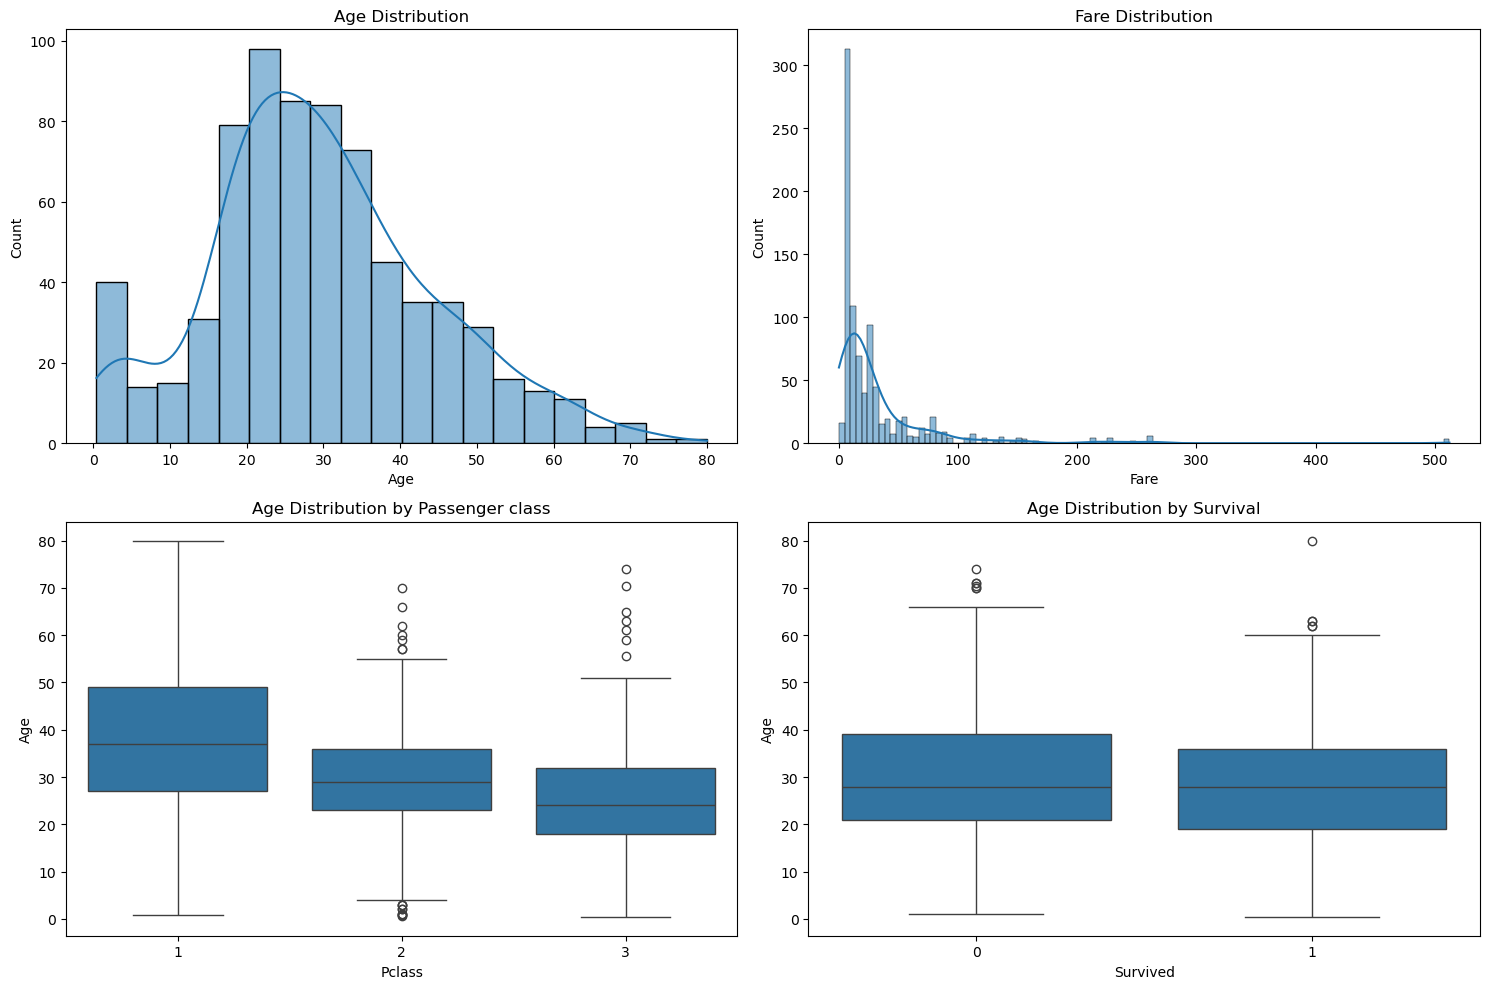

In [70]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(titanic['Age'].dropna(),kde= True)
plt.title('Age Distribution')
plt.subplot(2,2,2)
sns.histplot(titanic['Fare'], kde= True)
plt.title('Fare Distribution')
plt.subplot(2,2,3)
plt.title('Age Distribution by Passenger class')
sns.boxplot(x = 'Pclass', y = 'Age',data = titanic)
plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age Distribution by Survival')
plt.tight_layout()

In [72]:
plt.savefig('numerical_analysis.png')


<Figure size 640x480 with 0 Axes>